<a href="https://colab.research.google.com/github/wllgrnt/keras-examples/blob/master/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3

Example models for:
- two-class classification
- many-class classification
- regression

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Binary classification

In [0]:

# Load the IMDB dataset
# I have to overwrite np.load as keras hasn't kept pace with the latest version of numpy
old = np.load
np.load = lambda *a,**k: old(*a,**k,allow_pickle=True)

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

np.load = old
del(old)


In [6]:
train_data.shape

(25000,)

In [11]:
def decode_review(coded_review):
  """
  A coded review is a list of word indices - this converts it back into a list of words
  """
  word_index  = keras.datasets.imdb.get_word_index()
  reverse_word_index = {value: key for key, value in word_index.items()}
  # -3 as 0,1,2 are reserved for padding, start of sequence, and unknown
  decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in coded_review])
  n = 100  # put newlines in for ease of reading
  return "\n".join([decoded_review[i:i + n] for i in range(0, len(decoded_review), n)])

print(decode_review(train_data[0]))

? this film was just brilliant casting location scenery story direction everyone's really suited the
 part they played and you could just imagine being there robert ? is an amazing actor and now the sa
me being director ? father came from the same scottish island as myself so i loved the fact there wa
s a real connection with this film the witty remarks throughout the film were great it was just bril
liant so much that i bought the film as soon as it was released for ? and would recommend it to ever
yone to watch and the fly fishing was amazing really cried at the end it was so sad and you know wha
t they say if you cry at a film it must have been good and this definitely was also ? to the two lit
tle boy's that played the ? of norman and paul they were just brilliant children are often left out 
of the ? list i think because the stars that play them all grown up are such a big profile for the w
hole film but these children are amazing and should be praised for what they have done don'

In [0]:
# We can't feed variable-length lists of integers into our network (apparently),
# so one-hot encode each integer as a vector of 0s with a 1 at the index of the integer  

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

W0613 18:55:59.688699 139681778009984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0613 18:55:59.725916 139681778009984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0613 18:55:59.730074 139681778009984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [15]:
# We could also pass in our own optimizers e.g. form keras.optimisers, ditto for metrics
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

W0613 18:57:02.308545 139681778009984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0613 18:57:02.338395 139681778009984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0613 18:57:02.345844 139681778009984 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [18]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

W0613 18:59:50.878329 139681778009984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.5087 - acc: 0.7813 - val_loss: 0.3802 - val_acc: 0.8690
Epoch 2/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.3007 - acc: 0.9051 - val_loss: 0.3006 - val_acc: 0.8899
Epoch 3/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.2181 - acc: 0.9281 - val_loss: 0.3085 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.1751 - acc: 0.9433 - val_loss: 0.2842 - val_acc: 0.8837
Epoch 5/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1427 - acc: 0.9542 - val_loss: 0.2847 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1150 - acc: 0.9654 - val_loss: 0.3155 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.0980 - acc: 0.9703 - val_loss: 0.3127 - 

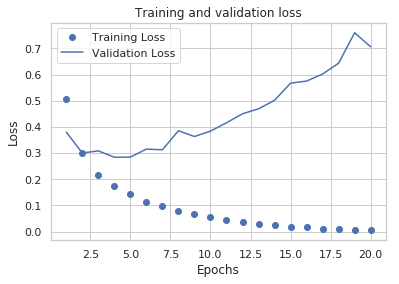

In [24]:
# Looks overfit beyond belief to me! We have a History object that can tell us more 

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) +1)

plt.plot(epochs, loss_values, "bo", label="Training Loss")
plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

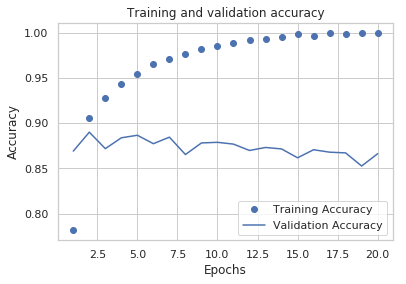

In [25]:
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [26]:
# We can generate the likelihood of reviews being positive using the `predict` method:

model.predict(X_test)

array([[0.00766921],
       [0.9999999 ],
       [0.892249  ],
       ...,
       [0.00103635],
       [0.00685436],
       [0.7414063 ]], dtype=float32)